In [1]:
import os
path = os.path.join('/home/scuervo/Documents/dev/reservoirpy')
import sys
sys.path.insert(0,path)

import numpy as np
from datetime import date, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from reservoirpy.wellproductivitypy import decline as dc
from reservoirpy.wellpy import path as ph


In [2]:
periods=pd.period_range(start=date(2021,1,1),end=date(2030,1,1),freq='A')

In [3]:
pr1 = ph.well(name='pr-1',fq='A')


p90 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=0, di=0.4, ti=date(2021,1,1), start_date=date(2021,1,1),end_date=date(2030,1,1),
                                     econ_limit=200, fluid_rate=2500,fq='M'),
        'capex':-4000
}}

p50 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=0.5, di=0.4, ti=date(2021,1,1), start_date=date(2021,1,1),end_date=date(2030,1,1),
                                     econ_limit=200, fluid_rate=2500,fq='M'),
        'capex':-4000
}}

p10 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=1, di=0.4, ti=date(2021,1,1), start_date=date(2021,1,1),end_date=date(2030,1,1),
                                     econ_limit=200, fluid_rate=2500,fq='M'),
        'capex':-4000
}}

pr1.add_schedule(
    {
        'p90':p90,
        'p50':p50,
        'p10':p10
    }
)



In [4]:
f1 = pr1.schedule_forecast()
f1

,qo,vo,np,period,case
time,,,,,
2021-12-31,2013.17,734805.28,734805.28,initial,p90
2022-12-31,1349.46,492554.71,1227359.98,initial,p90
2023-12-31,904.57,331073.87,1558433.85,initial,p90
2024-12-31,605.69,221076.69,1779510.54,initial,p90
2025-12-31,406.01,148192.14,1927702.67,initial,p90
2021-12-31,2085.24,761111.59,761111.59,initial,p50
2022-12-31,1531.81,559111.04,1320222.63,initial,p50
2023-12-31,1172.68,429200.17,1749422.80,initial,p50
2024-12-31,925.93,337962.96,2087385.77,initial,p50


In [5]:
pr1.cashflow['p10']['capex'].cashflow()

2021   -4000.0
2022       0.0
2023       0.0
2024       0.0
2025       0.0
2026       0.0
2027       0.0
2028       0.0
Freq: A-DEC, Name: capex_pr-1, dtype: float64

<AxesSubplot:xlabel='time', ylabel='qo'>

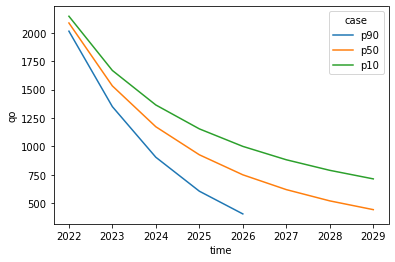

In [6]:
sns.lineplot(data=f1, x=f1.index, y='qo', hue='case')

In [7]:
pr1.cashflow

{'p90': {'capex': <reservoirpy.cashflows.timeseries.cash at 0x7f13d92ccd60>,
  'depreciation': <reservoirpy.cashflows.timeseries.cash at 0x7f13d92ccd00>},
 'p50': {'capex': <reservoirpy.cashflows.timeseries.cash at 0x7f13d92ccfd0>,
  'depreciation': <reservoirpy.cashflows.timeseries.cash at 0x7f13d92cce50>},
 'p10': {'capex': <reservoirpy.cashflows.timeseries.cash at 0x7f1414d96580>,
  'depreciation': <reservoirpy.cashflows.timeseries.cash at 0x7f13ed1a8d60>}}

# add finantials

In [8]:
periods=pd.period_range(start=date(2021,1,1),end=date(2030,1,1),freq='A')

In [9]:
periods[0].to_timestamp()

Timestamp('2021-01-01 00:00:00')

In [10]:
[8]*4+[1]*2

[8, 8, 8, 8, 1, 1]

In [18]:
pr2 = ph.well(name='pr-1',fq='A')


p90 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=0, di=0.4, ti=date(2021,1,1), start_date=date(2021,1,1),end_date=date(2030,1,1),
                                     econ_limit=200, fluid_rate=2500,fq='M'),
        'capex':-4000,
        'fix_opex':pd.Series([-180]*5 + [-140]*5,index=periods),
        'var_oil_opex': -12/1000,
        'oil_price': 45/1000,
        'abandonment':-200
}}

p50 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=0.5, di=0.4, ti=date(2021,1,1), start_date=date(2021,1,1),end_date=date(2030,1,1),
                                     econ_limit=200, fluid_rate=2500,fq='M'),
        'capex':-4000,
        'fix_opex':pd.Series(np.linspace(140,180,10),index=periods),
        'var_oil_opex': pd.Series([-12/1000]*4+[-15/1000]*6,index=periods),
        'oil_price': pd.Series(np.linspace(40,65,10),index=periods)/1000,
        'abandonment':-200
}}

p10 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=1, di=0.4, ti=date(2021,1,1), start_date=date(2021,1,1),end_date=date(2030,1,1),
                                     econ_limit=200, fluid_rate=2500,fq='M'),
        'capex':-4000,
        'fix_opex':pd.Series(np.linspace(140,180,10),index=periods),
        'var_oil_opex': pd.Series([-12/1000]*4+[-15/1000]*6,index=periods),
        'oil_price': pd.Series(np.linspace(40,45,10),index=periods)/1000,
        'abandonment':-200
}}

pr2.add_schedule(
    {
        'p90':p90,
        'p50':p50,
        'p10':p10
    }
)

In [19]:
f2 = pr2.schedule_forecast()
f2

,qo,vo,np,period,case
time,,,,,
2021-12-31,2013.17,734805.28,734805.28,initial,p90
2022-12-31,1349.46,492554.71,1227359.98,initial,p90
2023-12-31,904.57,331073.87,1558433.85,initial,p90
2024-12-31,605.69,221076.69,1779510.54,initial,p90
2025-12-31,406.01,148192.14,1927702.67,initial,p90
2021-12-31,2085.24,761111.59,761111.59,initial,p50
2022-12-31,1531.81,559111.04,1320222.63,initial,p50
2023-12-31,1172.68,429200.17,1749422.80,initial,p50
2024-12-31,925.93,337962.96,2087385.77,initial,p50


In [21]:
pr2.cashflow['p50']['fix_opex'].cashflow()

2021    140.000000
2022    144.444444
2023    148.888889
2024    153.333333
2025    157.777778
2026    162.222222
2027    166.666667
2028    171.111111
2029    175.555556
2030    180.000000
Freq: A-DEC, Name: fix_opex_pr-1, dtype: float64

In [25]:
pr2.get_fcf(case='p10',coc=0.12)

(      total_income   total_opex  total_capex  total_depreciation  \
 2021  28805.405344 -9253.066960      -4000.0         -882.324715   
 2022  22711.419966 -7160.002716          0.0         -686.133112   
 2023  18886.135207 -5843.186911          0.0         -562.857328   
 2024  16144.230917 -4900.512867          0.0         -474.726032   
 2025  14178.222222 -5317.222222          0.0         -411.429224   
 2026  12674.803783 -4668.660078          0.0         -363.025782   
 2027  11519.368484 -4167.543883          0.0         -325.702445   
 2028  10524.317572 -3738.583089       -200.0         -293.801361   
 2029      0.000000   175.555556          0.0            0.000000   
 2030      0.000000   180.000000          0.0            0.000000   
 
               ebit          tax    net_income  free_cash_flow  \
 2021  18670.013669  6161.104511  12508.909158     9391.233873   
 2022  14865.284139  4905.543766   9959.740373    10645.873485   
 2023  12480.090967  4118.430019   8361.6

## Group wells

In [13]:
w1 = ph.well(name='w1',fq='A')
w2 = ph.well(name='w2',fq='A')
w3 = ph.well(name='w3',fq='A')

gr1 = ph.wells_group(w1,w2,w3)
gr1.wells

{'w1': <reservoirpy.wellpy.path.wells.well at 0x7f13d90c4e20>,
 'w2': <reservoirpy.wellpy.path.wells.well at 0x7f13d90c4ca0>,
 'w3': <reservoirpy.wellpy.path.wells.well at 0x7f13d90c46a0>}

In [14]:

p90 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=0, di=0.4, ti=date(2021,1,1), start_date=date(2021,1,1),end_date=date(2030,1,1),
                                     econ_limit=200, fluid_rate=2500,fq='M'),
        'capex':-4000
}}

p50 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=0.5, di=0.4, ti=date(2021,1,1), start_date=date(2021,1,1),end_date=date(2030,1,1),
                                     econ_limit=200, fluid_rate=2500,fq='M'),
        'capex':-4000
}}

p10 = {
    'initial':{
        'declination':dc.declination(qi=3000, b=1, di=0.4, ti=date(2021,1,1), start_date=date(2021,1,1),end_date=date(2030,1,1),
                                     econ_limit=200, fluid_rate=2500,fq='M'),
        'capex':-4000
}}

pr1.add_schedule(
    {
        'p90':p90,
        'p50':p50,
        'p10':p10
    }
)